Handling Missing Data

![Screenshot 2024-02-28 at 1.02.44 AM.png](<attachment:Screenshot 2024-02-28 at 1.02.44 AM.png>)
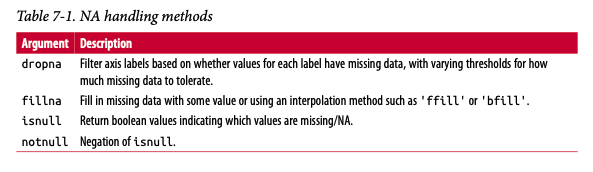

In [2]:
import pandas as pd

/var/folders/jm/7qcz1nys2_l6rk66dc2f48wc0000gn/T/ipykernel_31812/4080736814.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [4]:
from numpy import nan as NA

In [5]:
data = pd.Series([1, NA, 3.5, NA, 7])
data

0    1.0
1    NaN
2    3.5
3    NaN
4    7.0
dtype: float64

In [6]:
data.isnull()

0    False
1     True
2    False
3     True
4    False
dtype: bool

In [7]:
data.dropna()

0    1.0
2    3.5
4    7.0
dtype: float64

In [8]:
data[data.notnull()]

0    1.0
2    3.5
4    7.0
dtype: float64

In [9]:
data = pd.DataFrame([[1., 6.5, 3.], [1., NA, NA],
                      [NA, NA, NA], [NA, 6.5, 3.]])
data

,0,1,2
0,1.0,6.5,3.0
1,1.0,NaN,NaN
2,NaN,NaN,NaN
3,NaN,6.5,3.0


In [10]:
data.dropna()

,0,1,2
0,1.0,6.5,3.0


In [12]:
data.dropna(how='all')

,0,1,2
0,1.0,6.5,3.0
1,1.0,NaN,NaN
3,NaN,6.5,3.0


In [14]:
data[4] = NA
data.dropna(how='all', axis=1)

,0,1,2
0,1.0,6.5,3.0
1,1.0,NaN,NaN
2,NaN,NaN,NaN
3,NaN,6.5,3.0


In [18]:
data.iloc[2,:]

0   NaN
1   NaN
2   NaN
4   NaN
Name: 2, dtype: float64

In [20]:
import numpy as np

In [21]:

df = pd.DataFrame(np.random.randn(7, 3))
df.iloc[:4, 1] = NA
df.iloc[:2, 2] = NA

In [22]:
df

,0,1,2
0,1.076134,NaN,NaN
1,0.007477,NaN,NaN
2,1.677055,NaN,0.421800
3,-1.169440,NaN,0.418834
4,0.420773,-0.381395,-0.490221
5,0.603901,0.493437,-0.038515
6,-2.052043,-1.712448,-0.083541


In [25]:
df.dropna(thresh=2) #atleast 2 values should be present

,0,1,2
2,1.677055,NaN,0.421800
3,-1.169440,NaN,0.418834
4,0.420773,-0.381395,-0.490221
5,0.603901,0.493437,-0.038515
6,-2.052043,-1.712448,-0.083541


Filling In Missing Data

In [26]:
df.fillna(0)

,0,1,2
0,1.076134,0.000000,0.000000
1,0.007477,0.000000,0.000000
2,1.677055,0.000000,0.421800
3,-1.169440,0.000000,0.418834
4,0.420773,-0.381395,-0.490221
5,0.603901,0.493437,-0.038515
6,-2.052043,-1.712448,-0.083541


In [27]:
df

,0,1,2
0,1.076134,NaN,NaN
1,0.007477,NaN,NaN
2,1.677055,NaN,0.421800
3,-1.169440,NaN,0.418834
4,0.420773,-0.381395,-0.490221
5,0.603901,0.493437,-0.038515
6,-2.052043,-1.712448,-0.083541


In [28]:
df.fillna({1:5, 2:9})

,0,1,2
0,1.076134,5.000000,9.000000
1,0.007477,5.000000,9.000000
2,1.677055,5.000000,0.421800
3,-1.169440,5.000000,0.418834
4,0.420773,-0.381395,-0.490221
5,0.603901,0.493437,-0.038515
6,-2.052043,-1.712448,-0.083541


In [29]:
_ = df.fillna({1:5, 2:9}, inplace= True)
df

,0,1,2
0,1.076134,5.000000,9.000000
1,0.007477,5.000000,9.000000
2,1.677055,5.000000,0.421800
3,-1.169440,5.000000,0.418834
4,0.420773,-0.381395,-0.490221
5,0.603901,0.493437,-0.038515
6,-2.052043,-1.712448,-0.083541


In [30]:
df= pd.DataFrame(np.random.randn(7,3))
df

,0,1,2
0,-2.320012,0.021986,-0.183453
1,1.321125,0.032833,0.722473
2,0.094077,0.366768,-0.035951
3,-1.306145,-0.947274,1.765774
4,-0.731016,0.325146,-0.555777
5,-0.373260,0.206647,-0.362221
6,0.650466,1.674514,0.743067


In [31]:
df.iloc[:2, 1]= np.nan
df.iloc[4:,2]= NA

In [32]:
df

,0,1,2
0,-2.320012,NaN,-0.183453
1,1.321125,NaN,0.722473
2,0.094077,0.366768,-0.035951
3,-1.306145,-0.947274,1.765774
4,-0.731016,0.325146,NaN
5,-0.373260,0.206647,NaN
6,0.650466,1.674514,NaN


In [33]:
df.fillna(method='ffill') #firstfill is adding the previous non empty value

/var/folders/jm/7qcz1nys2_l6rk66dc2f48wc0000gn/T/ipykernel_31812/1193302488.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill')


,0,1,2
0,-2.320012,NaN,-0.183453
1,1.321125,NaN,0.722473
2,0.094077,0.366768,-0.035951
3,-1.306145,-0.947274,1.765774
4,-0.731016,0.325146,1.765774
5,-0.373260,0.206647,1.765774
6,0.650466,1.674514,1.765774


In [35]:
df.fillna(method='ffill', limit=1)

/var/folders/jm/7qcz1nys2_l6rk66dc2f48wc0000gn/T/ipykernel_31812/3640860781.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', limit=1)


,0,1,2
0,-2.320012,NaN,-0.183453
1,1.321125,NaN,0.722473
2,0.094077,0.366768,-0.035951
3,-1.306145,-0.947274,1.765774
4,-0.731016,0.325146,1.765774
5,-0.373260,0.206647,NaN
6,0.650466,1.674514,NaN


In [37]:
df.fillna(df.max())

,0,1,2
0,-2.320012,1.674514,-0.183453
1,1.321125,1.674514,0.722473
2,0.094077,0.366768,-0.035951
3,-1.306145,-0.947274,1.765774
4,-0.731016,0.325146,1.765774
5,-0.373260,0.206647,1.765774
6,0.650466,1.674514,1.765774


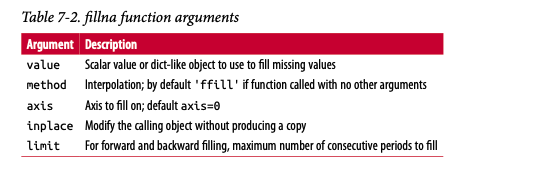

7.2 Data Transformation\
Removing duplicates

In [39]:
data= pd.DataFrame({'k':['one', 'two']*3+['two'], 'g':[1, 1, 2, 3, 3, 4, 4]})
data

,k,g
0,one,1
1,two,1
2,one,2
3,two,3
4,one,3
5,two,4
6,two,4


In [41]:
data.duplicated().sum()

1

In [42]:
data.drop_duplicates()

,k,g
0,one,1
1,two,1
2,one,2
3,two,3
4,one,3
5,two,4


In [43]:
data['v']= range(7)
data

,k,g,v
0,one,1,0
1,two,1,1
2,one,2,2
3,two,3,3
4,one,3,4
5,two,4,5
6,two,4,6


In [45]:
data.drop_duplicates(['k'], keep= 'last')

,k,g,v
4,one,3,4
6,two,4,6


Transforming Data Using a Function or Mapping

In [46]:
data = pd.DataFrame({'food': ['bacon', 'pulled pork', 'bacon',
                            'Pastrami', 'corned beef', 'Bacon',
                            'pastrami', 'honey ham', 'nova lox'],
                    'ounces': [4, 3, 12, 6, 7.5, 8, 3, 5, 6]})

data

,food,ounces
0,bacon,4.0
1,pulled pork,3.0
2,bacon,12.0
3,Pastrami,6.0
4,corned beef,7.5
5,Bacon,8.0
6,pastrami,3.0
7,honey ham,5.0
8,nova lox,6.0


In [47]:
meal_to_animal= {
      'bacon': 'pig',
      'pulled pork': 'pig',
      'pastrami': 'cow',
      'corned beef': 'cow',
      'honey ham': 'pig',
      'nova lox': 'salmon'
}

meal_to_animal

{'bacon': 'pig',
 'pulled pork': 'pig',
 'pastrami': 'cow',
 'corned beef': 'cow',
 'honey ham': 'pig',
 'nova lox': 'salmon'}

In [50]:
lower_cased= data['food'].str.lower()
lower_cased

0          bacon
1    pulled pork
2          bacon
3       pastrami
4    corned beef
5          bacon
6       pastrami
7      honey ham
8       nova lox
Name: food, dtype: object

In [52]:
data['animal']=lower_cased.map(meal_to_animal)     #map 
data

,food,ounces,animal
0,bacon,4.0,pig
1,pulled pork,3.0,pig
2,bacon,12.0,pig
3,Pastrami,6.0,cow
4,corned beef,7.5,cow
5,Bacon,8.0,pig
6,pastrami,3.0,cow
7,honey ham,5.0,pig
8,nova lox,6.0,salmon


In [56]:
data['new_animal']=data['food'].map(lambda x:meal_to_animal[x.lower()] )

In [57]:
data

,food,ounces,animal,new_animal
0,bacon,4.0,pig,pig
1,pulled pork,3.0,pig,pig
2,bacon,12.0,pig,pig
3,Pastrami,6.0,cow,cow
4,corned beef,7.5,cow,cow
5,Bacon,8.0,pig,pig
6,pastrami,3.0,cow,cow
7,honey ham,5.0,pig,pig
8,nova lox,6.0,salmon,salmon


Replacing Values

In [58]:
data = pd.Series([1., -999., 2., -999., -1000., 3.])
data

0       1.0
1    -999.0
2       2.0
3    -999.0
4   -1000.0
5       3.0
dtype: float64

In [59]:
data.replace(-999, NA)

0       1.0
1       NaN
2       2.0
3       NaN
4   -1000.0
5       3.0
dtype: float64

In [60]:
data.replace([-999,-1000],  NA)

0    1.0
1    NaN
2    2.0
3    NaN
4    NaN
5    3.0
dtype: float64

In [61]:
data.replace([-999,-1000],  [NA,0])

0    1.0
1    NaN
2    2.0
3    NaN
4    0.0
5    3.0
dtype: float64

In [65]:
data.index.name

Renaming Axis Indexes

In [66]:
data = pd.DataFrame(np.arange(12).reshape((3, 4)),
                 index=['Ohio', 'Colorado', 'New York'],
         columns=['one', 'two', 'three', 'four'])

In [67]:
data

,one,two,three,four
Ohio,0,1,2,3
Colorado,4,5,6,7
New York,8,9,10,11


In [72]:
data.index=data.index.map(lambda x: x.upper())

In [80]:
data

,one,two,three,four
OHIO,0,1,2,3
COLORADO,4,5,6,7
NEW YORK,8,9,10,11


In [83]:

data.rename(index= str.title,columns= str.upper, inplace=True)

In [85]:
data.rename(index= {'Ohio': "INDIANA"})

,ONE,TWO,THREE,FOUR
INDIANA,0,1,2,3
Colorado,4,5,6,7
New York,8,9,10,11


In [86]:
data

,ONE,TWO,THREE,FOUR
Ohio,0,1,2,3
Colorado,4,5,6,7
New York,8,9,10,11


Discretization and Binning

In [87]:
ages = [20, 22, 25, 27, 21, 23, 37, 31, 61, 45, 41, 32]
bins = [18, 25, 35, 60, 100]

cats= pd.cut(ages, bins)
cats

[(18, 25], (18, 25], (18, 25], (25, 35], (18, 25], ..., (25, 35], (60, 100], (35, 60], (35, 60], (25, 35]]
Length: 12
Categories (4, interval[int64, right]): [(18, 25] < (25, 35] < (35, 60] < (60, 100]]

In [89]:
cats.codes

array([0, 0, 0, 1, 0, 0, 2, 1, 3, 2, 2, 1], dtype=int8)

In [90]:
cats.categories

IntervalIndex([(18, 25], (25, 35], (35, 60], (60, 100]], dtype='interval[int64, right]')

In [91]:
pd.value_counts(cats)

/var/folders/jm/7qcz1nys2_l6rk66dc2f48wc0000gn/T/ipykernel_31812/1485279302.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  pd.value_counts(cats)


(18, 25]     5
(25, 35]     3
(35, 60]     3
(60, 100]    1
Name: count, dtype: int64

In [92]:
pd.cut(ages, bins, right=False, labels=['Youth', 'YoungAdult', 'MiddleAged', 'Senior'])

['Youth', 'Youth', 'YoungAdult', 'YoungAdult', 'Youth', ..., 'YoungAdult', 'Senior', 'MiddleAged', 'MiddleAged', 'YoungAdult']
Length: 12
Categories (4, object): ['Youth' < 'YoungAdult' < 'MiddleAged' < 'Senior']